                            benchmarkId          board  \
0  7464b756-e228-4e4d-bc30-a06bafd4d732  STM32H7S78-DK   

                                           createdAt  \
0  Sun Jun 16 2024 11:56:24 GMT+0200 (Central Eur...   

                                              sha256  \
0  c840ef6d6284a744a4b7c29c9fca0e66b71a20ea55ce1c...   

                                md5 state     cycles  duration_ms  \
0  248823ab841ca65d2409e77e25957f60  done  498857482   831.429137   

                                              device  frequency_MHz  ...  \
0  stm32 family - 0x485 - STM32H7[R,]Sxx @600/300...            600  ...   

  external_flash  internal_ram  external_ram  activations_bytes  \
0        2605748        380136        602112             968048   

   weights_bytes  extra_flash_bytes  kernel_flash_bytes extra_ram_bytes  \
0        2605748                NaN               39849             NaN   

  kernel_ram_bytes  io_bytes  
0            14200       0/0  

[1 rows x 35 col

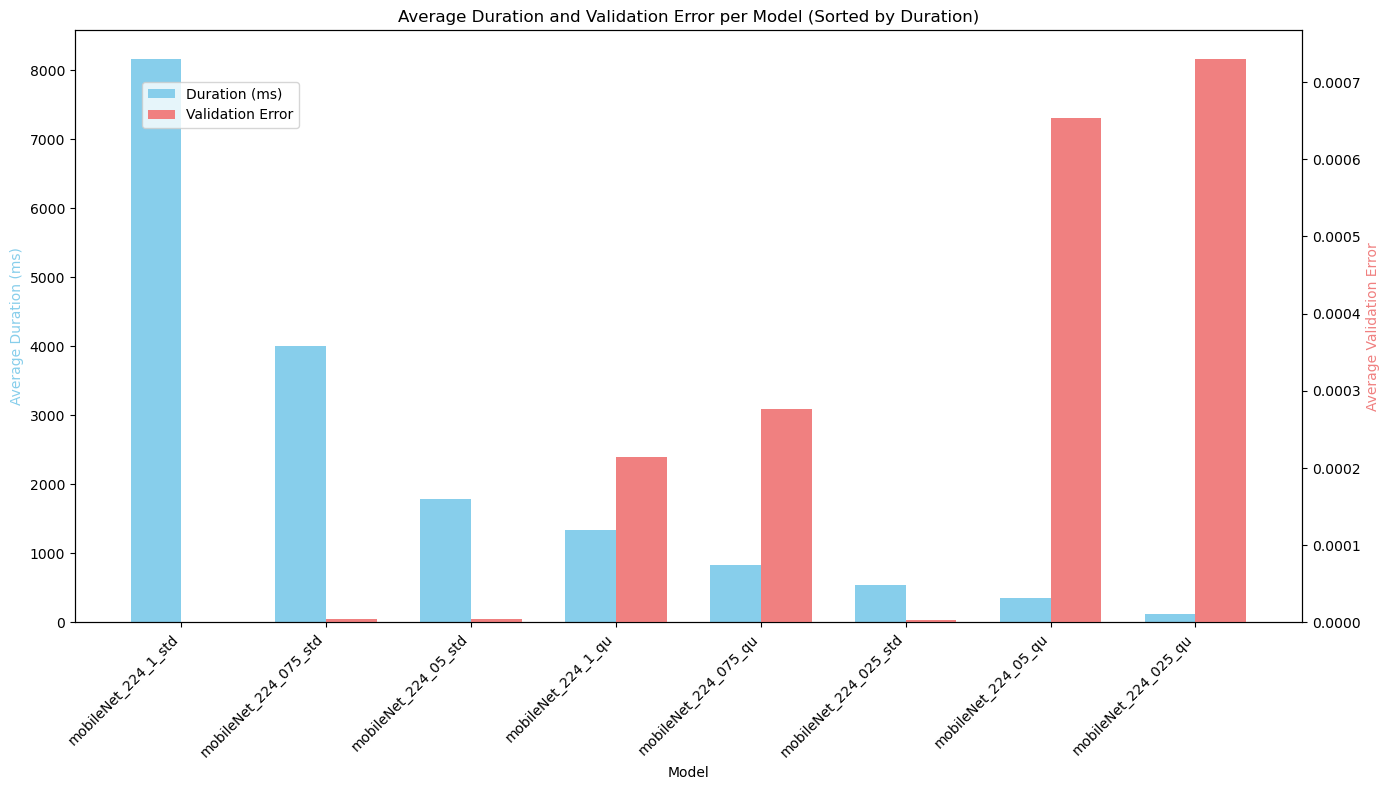

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files into DataFrames for df224 models
df224_1_qu = pd.read_csv('../data/mobileNet_224/1_0/quantized/mobilenet_v1_1.0_224_quant_MCU.csv', delimiter=',')
df224_1_std = pd.read_csv('../data/mobileNet_224/1_0/standard/mobilenet_v1_1.0_224_tfs_MCU.csv', delimiter=',')
df224_075_qu = pd.read_csv('../data/mobileNet_224/0_75/qtz/mobilenet_v1_0_75_224_qtz_H7.csv', delimiter=',')
df224_075_std = pd.read_csv('../data/mobileNet_224/0_75/std/mobilenet_v1_0_75_224_H7.csv', delimiter=',')
df224_05_qu = pd.read_csv('../data/mobileNet_224/0_50/qtz/mobilenet_v1_0_5_224_qtz_H7.csv', delimiter=',')
df224_05_std = pd.read_csv('../data/mobileNet_224/0_50/std/mobilnet_v1_0_5_224_H7.csv', delimiter=',')
df224_025_qu = pd.read_csv('../data/mobileNet_224/0_25/qtzReal/mobilenet_0_25_224_qtz_H7.csv', delimiter=',')
df224_025_std = pd.read_csv('../data/mobileNet_224/0_25/standard/mobilenet_v1_0.25_224_MCU.csv', delimiter=',')

# Define a function to filter the DataFrame
def filter_df(df):
    return df[(df["board"] == "STM32H7S78-DK") & (df["optimization"] == "balanced")]

# Filter DataFrames
df224_1_qu_filtered = filter_df(df224_1_qu)
df224_1_std_filtered = filter_df(df224_1_std)
df224_075_qu_filtered = filter_df(df224_075_qu)
df224_075_std_filtered = filter_df(df224_075_std)
df224_05_qu_filtered = filter_df(df224_05_qu)
df224_05_std_filtered = filter_df(df224_05_std)
df224_025_qu_filtered = filter_df(df224_025_qu)
df224_025_std_filtered = filter_df(df224_025_std)

print(df224_075_qu_filtered)

# Extract and average inference times
duration_times = {
    "mobileNet_224_1_qu": df224_1_qu_filtered["duration_ms"].mean(),
    "mobileNet_224_1_std": df224_1_std_filtered["duration_ms"].mean(),
    "mobileNet_224_075_qu": df224_075_qu_filtered["duration_ms"].mean(),
    "mobileNet_224_075_std": df224_075_std_filtered["duration_ms"].mean(),
    "mobileNet_224_05_qu": df224_05_qu_filtered["duration_ms"].mean(),
    "mobileNet_224_05_std": df224_05_std_filtered["duration_ms"].mean(),
    "mobileNet_224_025_qu": df224_025_qu_filtered["duration_ms"].mean(),
    "mobileNet_224_025_std": df224_025_std_filtered["duration_ms"].mean(),
}

# Extract and average validation errors
validation_errors = {
    "mobileNet_224_1_qu": df224_1_qu_filtered["val_error"].mean(),
    "mobileNet_224_1_std": df224_1_std_filtered["val_error"].mean(),
    "mobileNet_224_075_qu": df224_075_qu_filtered["val_error"].mean(),
    "mobileNet_224_075_std": df224_075_std_filtered["val_error"].mean(),
    "mobileNet_224_05_qu": df224_05_qu_filtered["val_error"].mean(),
    "mobileNet_224_05_std": df224_05_std_filtered["val_error"].mean(),
    "mobileNet_224_025_qu": df224_025_qu_filtered["val_error"].mean(),
    "mobileNet_224_025_std": df224_025_std_filtered["val_error"].mean(),
}

# Sort duration times from max to min
sorted_duration_times = dict(sorted(duration_times.items(), key=lambda item: item[1], reverse=True))
# Sort validation errors based on the order of sorted_duration_times
sorted_validation_errors = {k: validation_errors[k] for k in sorted_duration_times.keys()}

# Plot the average duration times and validation errors as a bar chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# X-axis labels
labels = sorted_duration_times.keys()
x = np.arange(len(labels))

# Bar width
width = 0.35

# Bar chart for duration times
bars1 = ax1.bar(x - width/2, sorted_duration_times.values(), width, label='Duration (ms)', color='skyblue')

# Y-axis for validation errors
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, sorted_validation_errors.values(), width, label='Validation Error', color='lightcoral')

# Labels and titles
ax1.set_xlabel('Model')
ax1.set_ylabel('Average Duration (ms)', color='skyblue')
ax2.set_ylabel('Average Validation Error', color='lightcoral')
plt.title('Average Duration and Validation Error per Model (Sorted by Duration)')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')

# Legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()